In [ ]:
'''
Homework 4
Name: Austin Ramsey
ID: 000749074
LTU Honor Code: “I have neither given nor received any unauthorized aid in completing this work, nor have I presented someone else's work as my own.”

'''

In [15]:
import keras 
from keras.datasets import mnist

# The MNIST dataset is pre-loaded in Keras, in the form of a set of four Numpy arrays
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [16]:
from keras import models
from keras import layers
from keras.utils import to_categorical

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape train images
train_images2 = train_images.reshape((60000, 28 * 28))
train_images2 = train_images2.astype('float32') / 255

# Reshape test images
test_images2 = test_images.reshape((10000, 28 * 28))
test_images2 = test_images2.astype('float32') / 255

# Categoricalize labels (reshape)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Split train dataset into train and test 80/20
x_val = train_images2[:12000]
x_train = train_images2[12000:]
y_val = train_labels[:12000]
y_train = train_labels[12000:]

# Check the shape of new sets
print(x_val.shape)
print(x_train.shape)
print(y_val.shape)
print(y_train.shape)

# Create a fit
history = network.fit(x_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(x_val, y_val))

(12000, 784)
(48000, 784)
(12000, 10)
(48000, 10)
Epoch 1/20
375/375 [==============================] - 5s 11ms/step - loss: 0.2949 - accuracy: 0.9153 - val_loss: 0.1536 - val_accuracy: 0.9563
Epoch 2/20
375/375 [==============================] - 4s 10ms/step - loss: 0.1230 - accuracy: 0.9632 - val_loss: 0.1045 - val_accuracy: 0.9707
Epoch 3/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0797 - accuracy: 0.9759 - val_loss: 0.0903 - val_accuracy: 0.9737
Epoch 4/20
375/375 [==============================] - 4s 10ms/step - loss: 0.0576 - accuracy: 0.9833 - val_loss: 0.0796 - val_accuracy: 0.9766
Epoch 5/20
375/375 [==============================] - 4s 10ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0758 - val_accuracy: 0.9768
Epoch 6/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0322 - accuracy: 0.9907 - val_loss: 0.0714 - val_accuracy: 0.9788
Epoch 7/20
375/375 [==============================] - 4s 10ms/step - loss: 0.0237 - accuracy

In [30]:
# Needed to find dict keys
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print(acc)
print(loss)
print(val_acc)
print(val_loss)

[0.9152916669845581, 0.9631666541099548, 0.9758958220481873, 0.9833124876022339, 0.9869999885559082, 0.9906666874885559, 0.9936875104904175, 0.9955416917800903, 0.9968125224113464, 0.9977708458900452, 0.9984791874885559, 0.9989374876022339, 0.9993125200271606, 0.9996041655540466, 0.9998541474342346, 0.9998541474342346, 0.9999791383743286, 0.9999791383743286, 1.0, 1.0]
[0.2949250042438507, 0.12296400219202042, 0.07968194037675858, 0.057614490389823914, 0.04240226373076439, 0.032174065709114075, 0.023707155138254166, 0.017879515886306763, 0.013310199603438377, 0.009809151291847229, 0.0070415157824754715, 0.005382088478654623, 0.003943094052374363, 0.0025658549275249243, 0.00155984319280833, 0.001196118537336588, 0.0008459450327791274, 0.0006307700532488525, 0.0005062058917246759, 0.00041874864837154746]
[0.956333339214325, 0.9706666469573975, 0.9736666679382324, 0.9765833616256714, 0.9767500162124634, 0.9788333177566528, 0.9777500033378601, 0.9780833125114441, 0.9800000190734863, 0.98008

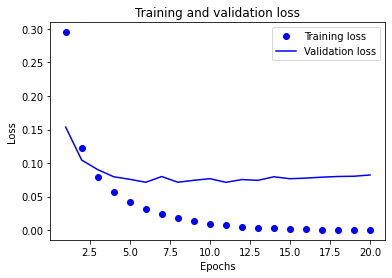

In [38]:
import matplotlib.pyplot as plt

# Plot training and validation loss graph
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b - "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

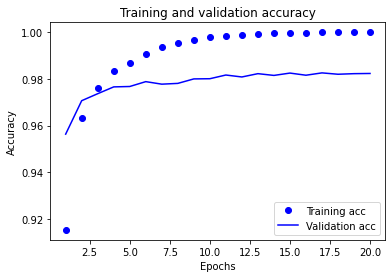

In [39]:
plt.clf()   # clear figure

# Plot training and validation accuracy graph
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
# Evalute model again test dataset
test_loss, test_acc = network.evaluate(test_images2, test_labels) # unseen images

313/313 [==============================] - 1s 4ms/step - loss: 0.0743 - accuracy: 0.9816


In [35]:
print('test_loss:    ', test_loss)
print('test_accuracy:', test_acc)

test_loss:     0.07425232231616974
test_accuracy: 0.9815999865531921


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


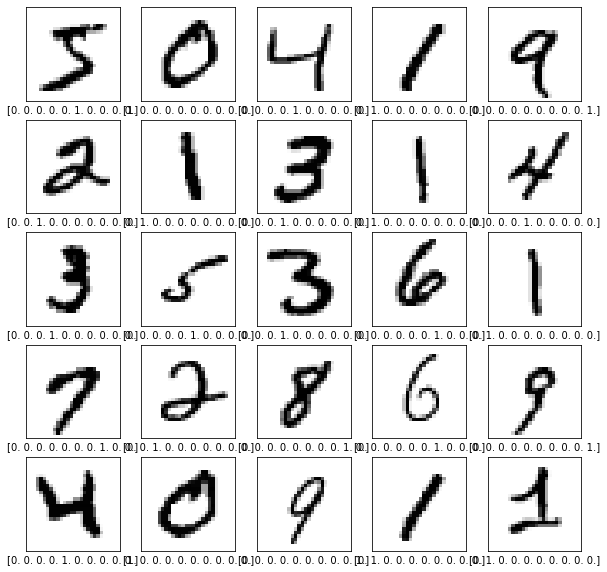

In [42]:
# Plot example images from the train dataset with labels
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

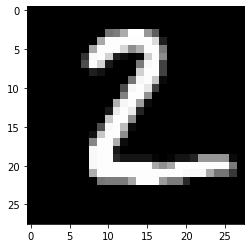

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
# Plot image from test dataset
plt.imshow(test_images[1], cmap='gray')
plt.show()
print(test_labels[1]) # converted to categorical

In [46]:
import numpy as np

# Predict what the digit was from test dataset image
out = network.predict(test_images2[1:2], verbose=0) # test_images2 has converted images for Keras

decoded_o = np.array([ np.argmax(o)  for o in out ])
print("The digit is =", decoded_o[0])

The digit is = 2


# Summary

For this homework we created a dense NN model to classify fashion images from the keras mnist dataset. I believe the model was developed well and provided great evidence as to why. After training the model and validating it can be seen in the first and second graphs that the accuracy of the model was 98.23%. As well, after evaluting the model using the test dataset it can be seen that the model achieved an accuracy of 98.15%. It can be said that the model could have been fitted better and provided better accuracy by adding more layers and number of neurons, but it is seen that the model did correctly predict the digit from an image from the test dataset. Overall the model performed well.

